In [2]:
import pandas as pd
import matplotlib.pyplot as plt
svi_data = pd.read_csv('cdc-svi-data.csv')

In [3]:
svi_data.columns[svi_data.isna().all()].tolist()
svi_data = svi_data.dropna(axis=1,how="all")

svi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9109 entries, 0 to 9108
Columns: 158 entries, ST to MP_OTHERRACE
dtypes: float64(75), int64(79), object(4)
memory usage: 11.0+ MB


In [4]:
columns_to_keep = ['FIPS',
                   'RPL_THEME1',
                   'RPL_THEME2',
                   'RPL_THEME3',
                   'RPL_THEME4',
                   'RPL_THEMES'
                  ]

In [5]:
svi_data_final = svi_data[columns_to_keep]
svi_data_final.head()

,FIPS,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES
0,6001400100,0.0112,0.4460,0.1188,0.0301,0.0255
1,6001400200,0.1017,0.1484,0.1761,0.5737,0.1978
2,6001400300,0.1244,0.2867,0.2412,0.8483,0.3560
3,6001400400,0.1054,0.1322,0.2036,0.4442,0.1596
4,6001400500,0.2959,0.0320,0.4151,0.2284,0.1312


In [6]:
columns = list(svi_data_final) # this is the same as df.columns.to_list()
svi_data_final.columns = ['FIPS',
'socio_econ_v_score',
'household_char_v_score',
'racial_ethnic_v_score',
'housing_transportation_v_score',
'final_v_score']
# See new columns applide to dataset.
svi_data_final.sample(5)

,FIPS,socio_econ_v_score,household_char_v_score,racial_ethnic_v_score,housing_transportation_v_score,final_v_score
3776,6037911001,0.7926,0.8487,0.2952,0.6353,0.7542
8222,6087100400,0.6497,0.0234,0.5431,0.9563,0.5714
2866,6037462800,0.2992,0.2706,0.4807,0.2101,0.2551
5116,6065042511,0.9611,0.6607,0.7674,0.6743,0.8642
4284,6059011708,0.5743,0.1028,0.3691,0.7359,0.4861


In [7]:
import geopandas as gpd
# read in a geojson file downloaded from the LA Times
tracts = gpd.read_file('census_tracts_2010.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [8]:
tracts = tracts[['GEOID10','geometry']]
tracts.rename(columns = {'GEOID10':'FIPS'}, inplace = True)

In [9]:
svi_data_final['FIPS'] = svi_data_final['FIPS'].astype(int)
tracts['FIPS'] = tracts['FIPS'].astype(int)

tracts_svi = tracts.merge(svi_data_final,on="FIPS")
tracts_svi.head()

/tmp/ipykernel_126/3229447807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svi_data_final['FIPS'] = svi_data_final['FIPS'].astype(int)


,FIPS,geometry,socio_econ_v_score,household_char_v_score,racial_ethnic_v_score,housing_transportation_v_score,final_v_score
0,6037911001,"POLYGON ((-117.66713 34.55801, -117.66713 34.5...",0.7926,0.8487,0.2952,0.6353,0.7542
1,6037980003,"POLYGON ((-117.88062 34.76362, -117.88252 34.7...",-999.0000,-999.0000,-999.0000,-999.0000,-999.0000
2,6037573003,"POLYGON ((-118.19925 33.79713, -118.19925 33.7...",0.7752,0.1440,0.6449,0.5027,0.5811
3,6037297602,"POLYGON ((-118.28799 33.72259, -118.28799 33.7...",0.5376,0.3353,0.4383,0.6471,0.5258
4,6037297601,"MULTIPOLYGON (((-118.28449 33.70997, -118.2842...",0.5603,0.6769,0.4478,0.4694,0.5640


Social Vulnerability Scores in LA Census Tracts


<AxesSubplot: >

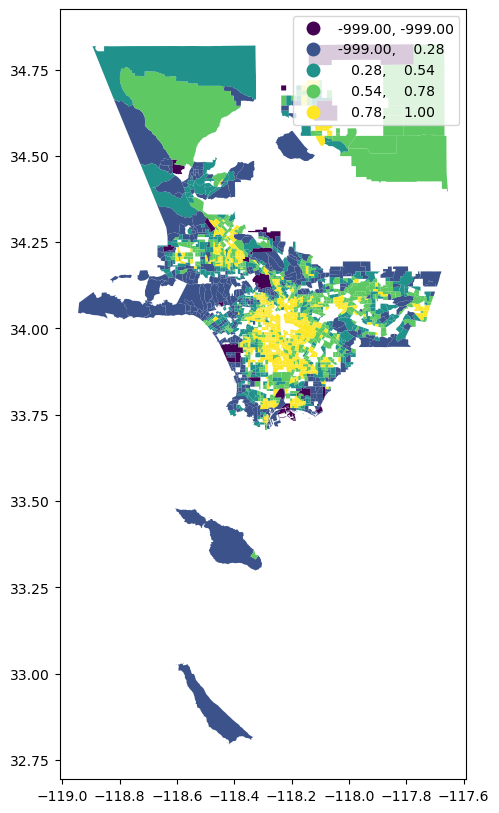

In [10]:
print("Social Vulnerability Scores in LA Census Tracts")
tracts_svi.plot(figsize=(12,10),
                 column='final_v_score',
                 legend=True, 
                 scheme='NaturalBreaks')

Vulnerability Scores Based Only on Socio-Economic Status in LA Census Tracts


<AxesSubplot: >

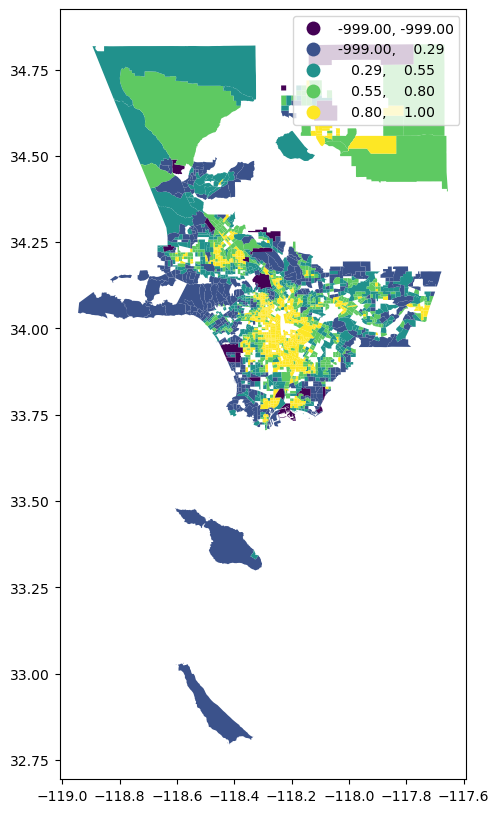

In [11]:
print("Vulnerability Scores Based Only on Socio-Economic Status in LA Census Tracts")
tracts_svi.plot(figsize=(12,10),
                 column='socio_econ_v_score',
                 legend=True, 
                 scheme='NaturalBreaks')

Vulnerability Scores Based Only on Household Characteristics in LA Census Tracts


<AxesSubplot: >

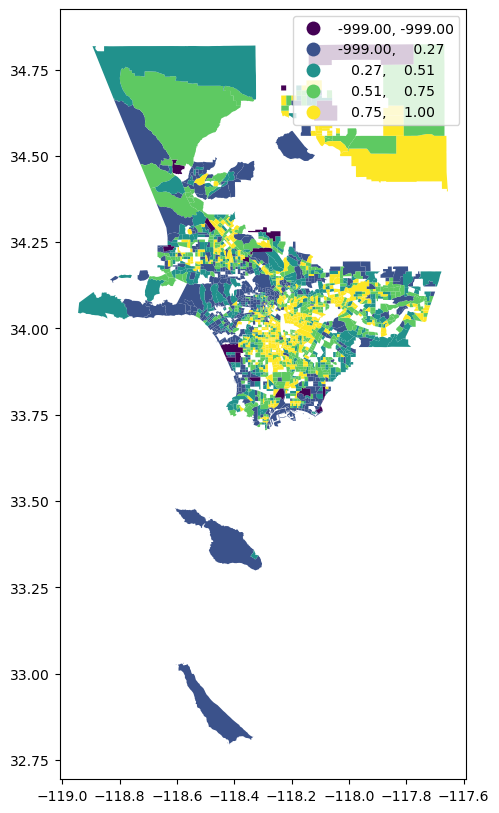

In [12]:
print("Vulnerability Scores Based Only on Household Characteristics in LA Census Tracts")
tracts_svi.plot(figsize=(12,10),
                 column='household_char_v_score',
                 legend=True, 
                 scheme='NaturalBreaks')

Vulnerability Scores Based Only on Racial and Ethic Background in LA Census Tracts


<AxesSubplot: >

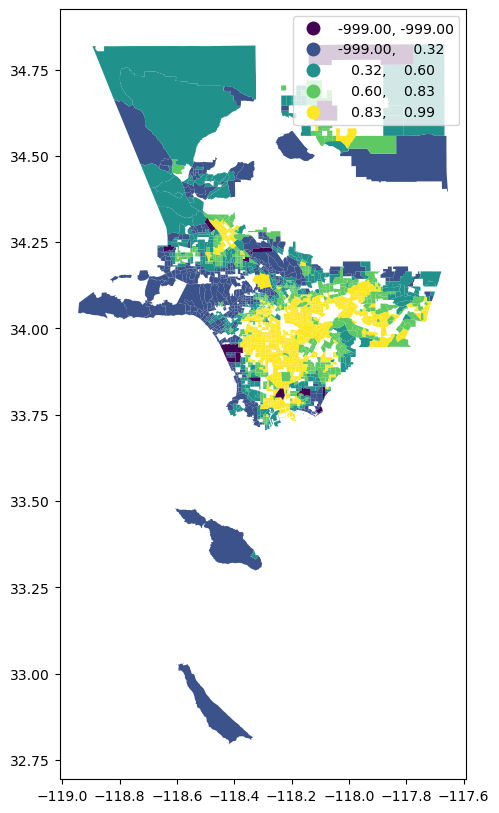

In [13]:
print("Vulnerability Scores Based Only on Racial and Ethic Background in LA Census Tracts")
tracts_svi.plot(figsize=(12,10),
                 column='racial_ethnic_v_score',
                 legend=True, 
                 scheme='NaturalBreaks')

Vulnerability Scores Based Only on Housing & Transportation in LA Census Tracts


<AxesSubplot: >

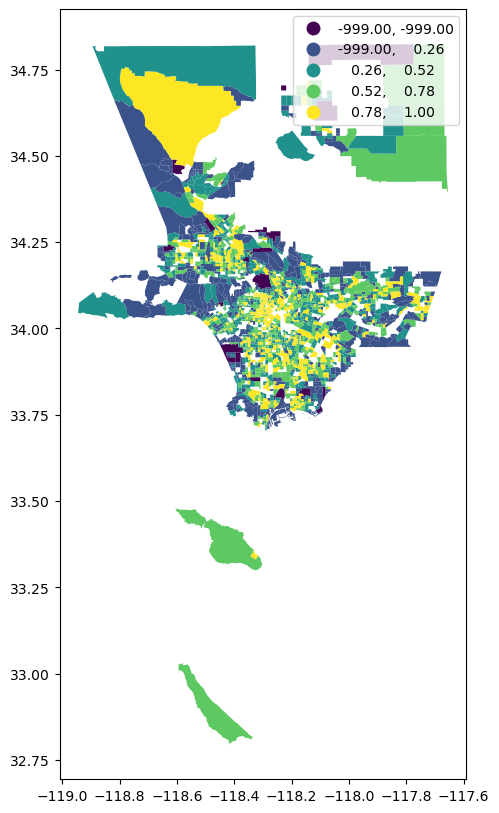

In [14]:
print("Vulnerability Scores Based Only on Housing & Transportation in LA Census Tracts")
tracts_svi.plot(figsize=(12,10),
                 column='housing_transportation_v_score',
                 legend=True, 
                 scheme='NaturalBreaks')

In [15]:
libraries = pd.read_csv('Libraries - City_County.csv')
libraries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          160 non-null    float64
 1   Y          160 non-null    float64
 2   OBJECTID   160 non-null    int64  
 3   org_name   160 non-null    object 
 4   Name       160 non-null    object 
 5   addrln1    160 non-null    object 
 6   city       160 non-null    object 
 7   state      160 non-null    object 
 8   post_id    160 non-null    int64  
 9   zip        160 non-null    int64  
 10  latitude   160 non-null    float64
 11  longitude  160 non-null    float64
 12  POINT_X    160 non-null    float64
 13  POINT_Y    160 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 17.6+ KB


In [16]:
desired_columns = ['org_name','Name','city', 'zip', 'latitude', 'longitude']

In [17]:
libraries_trimmed = libraries[desired_columns].copy()
libraries_trimmed.head()

,org_name,Name,city,zip,latitude,longitude
0,LA County,LA County Library - A C Bilbrew Library,Los Angeles,90061,33.916229,-118.272075
1,LA County,LA County Library - Agoura Hills Library,Agoura Hills,91301,34.143205,-118.775331
2,LA County,LA County Library - Alondra Library,Norwalk,90650,33.887956,-118.078456
3,LA County,LA County Library - Angelo M. Iacoboni Library,Lakewood,90712,33.848716,-118.133336
4,LA County,LA County Library - Antelope Valley Bookmobile,Lancaster,93534,34.698131,-118.139522


In [18]:
libraries_trimmed.loc[libraries_trimmed['org_name'] == 'LA County']

,org_name,Name,city,zip,latitude,longitude
0,LA County,LA County Library - A C Bilbrew Library,Los Angeles,90061,33.916229,-118.272075
1,LA County,LA County Library - Agoura Hills Library,Agoura Hills,91301,34.143205,-118.775331
2,LA County,LA County Library - Alondra Library,Norwalk,90650,33.887956,-118.078456
3,LA County,LA County Library - Angelo M. Iacoboni Library,Lakewood,90712,33.848716,-118.133336
4,LA County,LA County Library - Antelope Valley Bookmobile,Lancaster,93534,34.698131,-118.139522
...,...,...,...,...,...,...
82,LA County,LA County Library - West Hollywood Library,West Hollywood,90069,34.081673,-118.383376
83,LA County,LA County Library - Westlake Village Library,Westlake Village,91361,34.144475,-118.799099
84,LA County,LA County Library - Willowbrook Library,Los Angeles,90059,33.925432,-118.238994
85,LA County,LA County Library - Wiseburn Library,Hawthorne,90250,33.909533,-118.373157


In [19]:
pd.set_option('display.max_rows', None)

In [20]:
countylib = libraries_trimmed.loc[libraries_trimmed['org_name'] == 'LA County']
countylib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   org_name   87 non-null     object 
 1   Name       87 non-null     object 
 2   city       87 non-null     object 
 3   zip        87 non-null     int64  
 4   latitude   87 non-null     float64
 5   longitude  87 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [21]:
libraries_trimmed.loc[libraries_trimmed['org_name'] == 'LA County']

,org_name,Name,city,zip,latitude,longitude
0,LA County,LA County Library - A C Bilbrew Library,Los Angeles,90061,33.916229,-118.272075
1,LA County,LA County Library - Agoura Hills Library,Agoura Hills,91301,34.143205,-118.775331
2,LA County,LA County Library - Alondra Library,Norwalk,90650,33.887956,-118.078456
3,LA County,LA County Library - Angelo M. Iacoboni Library,Lakewood,90712,33.848716,-118.133336
4,LA County,LA County Library - Antelope Valley Bookmobile,Lancaster,93534,34.698131,-118.139522
5,LA County,LA County Library - Anthony Quinn Library,Los Angeles,90063,34.040714,-118.180207
6,LA County,LA County Library - Artesia Library,Artesia,90701,33.860596,-118.079085
7,LA County,LA County Library - Avalon Library,Avalon,90704,33.343074,-118.327314
8,LA County,LA County Library - Baldwin Park Library,Baldwin Park,91706,34.088062,-117.965424
9,LA County,LA County Library - Bell Gardens Library,Bell Gardens,90201,33.967138,-118.150555


In [22]:
geocountylib = gpd.GeoDataFrame(countylib, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(countylib.longitude, countylib.latitude))

In [23]:
countylib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   org_name   87 non-null     object  
 1   Name       87 non-null     object  
 2   city       87 non-null     object  
 3   zip        87 non-null     int64   
 4   latitude   87 non-null     float64 
 5   longitude  87 non-null     float64 
 6   geometry   87 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 5.4+ KB


In [24]:
geocountylib.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
libraries_trimmed.loc[libraries_trimmed['org_name'] == 'City of LA']

,org_name,Name,city,zip,latitude,longitude
87,City of LA,Los Angeles Public Library - Van Nuys Branch,Los Angeles,91401,34.183775,-118.446379
88,City of LA,Los Angeles Public Library - Alma Reaves Woods...,Los Angeles,90002,33.943847,-118.246428
89,City of LA,Los Angeles Public Library - Mark Twain Branch,Los Angeles,90003,33.948675,-118.282863
90,City of LA,Los Angeles Public Library - San Pedro Regiona...,Los Angeles,90731,33.735490,-118.292486
91,City of LA,Los Angeles Public Library - Robertson Branch,Los Angeles,90035,34.048354,-118.385804
92,City of LA,Los Angeles Public Library - Jefferson - Vassi...,Los Angeles,90018,34.025695,-118.319242
93,City of LA,Los Angeles Public Library - Donald Bruce Kauf...,Los Angeles,90049,34.052813,-118.468621
94,City of LA,Los Angeles Public Library - Wilshire Branch,Los Angeles,90004,34.074347,-118.311517
95,City of LA,Los Angeles Public Library - Washington Irving...,Los Angeles,90018,34.040037,-118.329130
96,City of LA,Los Angeles Public Library - Vermont Square Br...,Los Angeles,90037,33.999722,-118.295962


In [26]:
lapl = libraries_trimmed.loc[libraries_trimmed['org_name'] == 'City of LA']
lapl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 87 to 159
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   org_name   73 non-null     object 
 1   Name       73 non-null     object 
 2   city       73 non-null     object 
 3   zip        73 non-null     int64  
 4   latitude   73 non-null     float64
 5   longitude  73 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.0+ KB


In [27]:
geolapl = gpd.GeoDataFrame(lapl, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(lapl.longitude, lapl.latitude))

In [28]:
geolapl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 73 entries, 87 to 159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   org_name   73 non-null     object  
 1   Name       73 non-null     object  
 2   city       73 non-null     object  
 3   zip        73 non-null     int64   
 4   latitude   73 non-null     float64 
 5   longitude  73 non-null     float64 
 6   geometry   73 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 4.6+ KB


In [29]:
geolapl.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
import matplotlib.pyplot as plt
import contextily as ctx

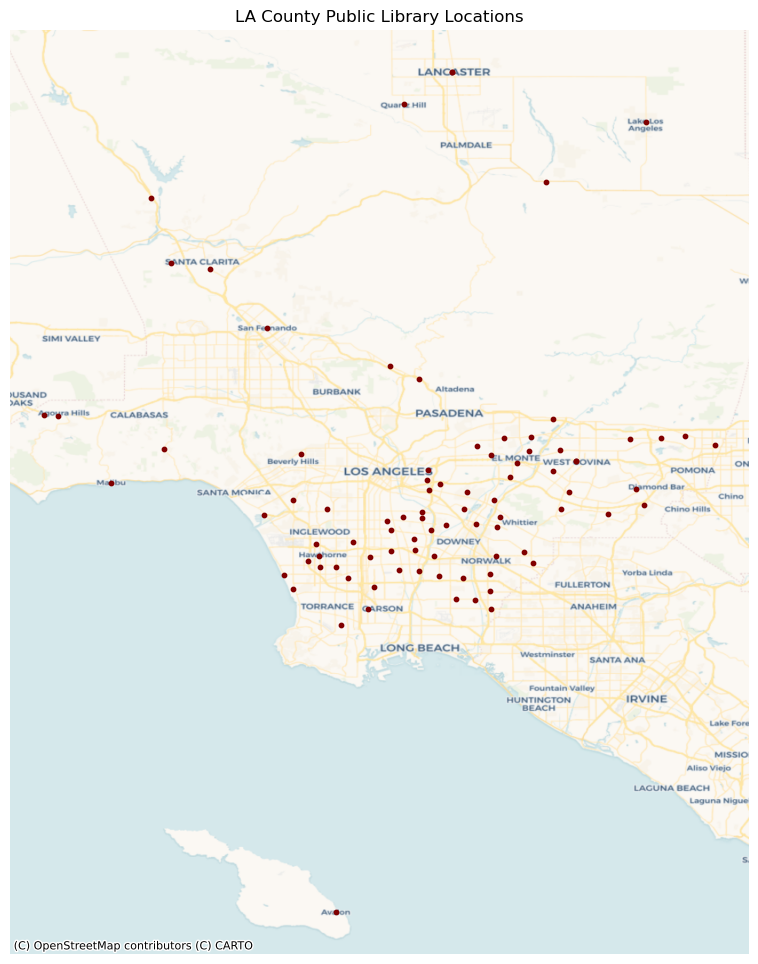

In [31]:
fig, ax = plt.subplots(figsize=(12,12))

geocountylib.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='#800000')

ax.axis('off')

ax.set_title('LA County Public Library Locations')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs=4326)

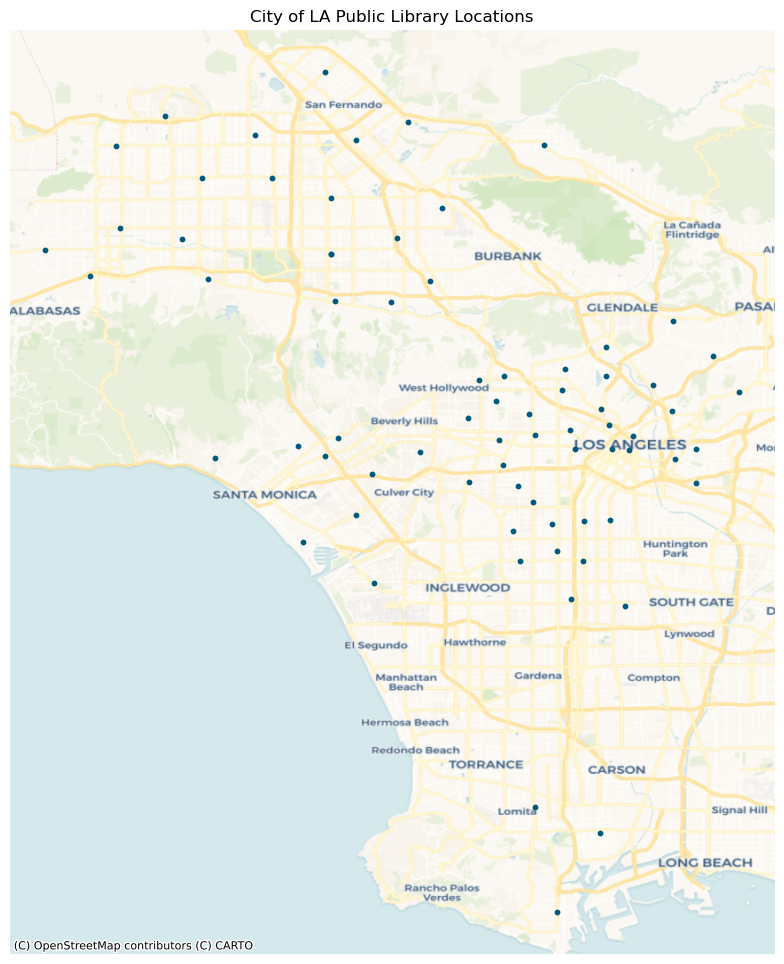

In [32]:
fig, ax = plt.subplots(figsize=(12,12))

geolapl.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='#005a80')

ax.axis('off')

ax.set_title('City of LA Public Library Locations')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs=4326)

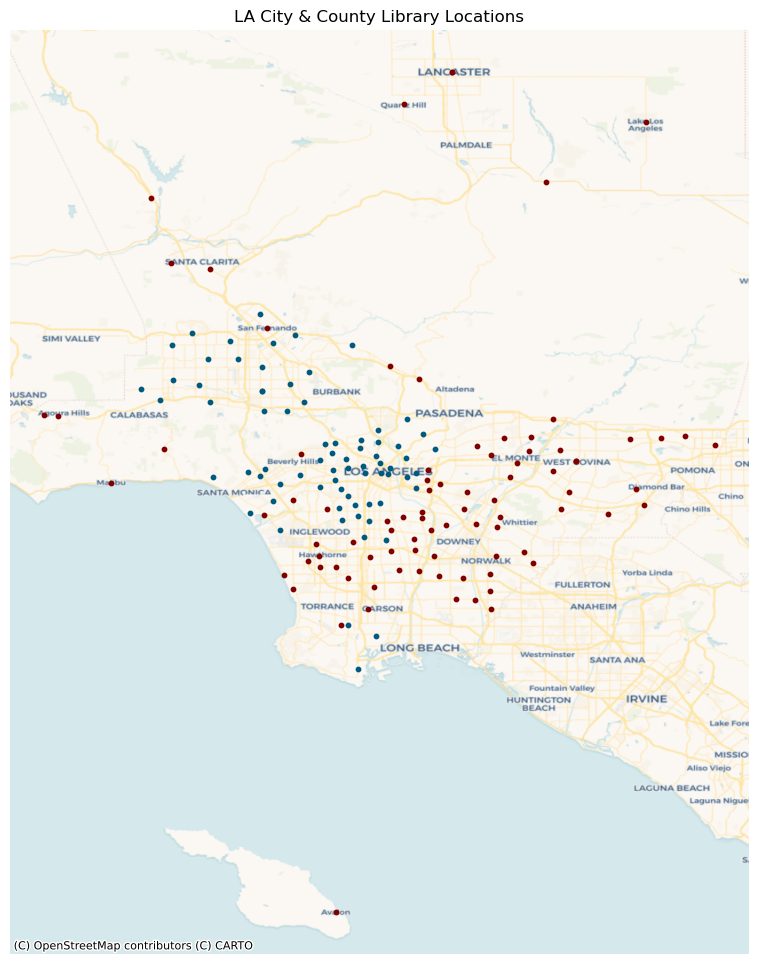

In [33]:
fig, ax = plt.subplots(figsize=(12,12))

geolapl.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='#005a80')

geocountylib.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='#800000')

ax.axis('off')

ax.set_title('LA City & County Library Locations')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs=4326)

In [34]:
city_gdf = gpd.read_file('City_Boundaries.zip')

<AxesSubplot: >

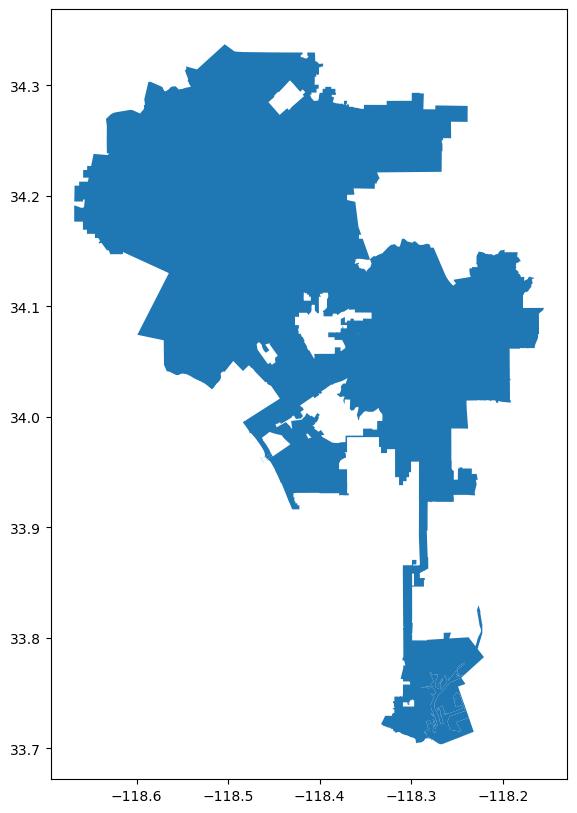

In [35]:
city_gdf.plot(figsize=(12,10))

<AxesSubplot: >

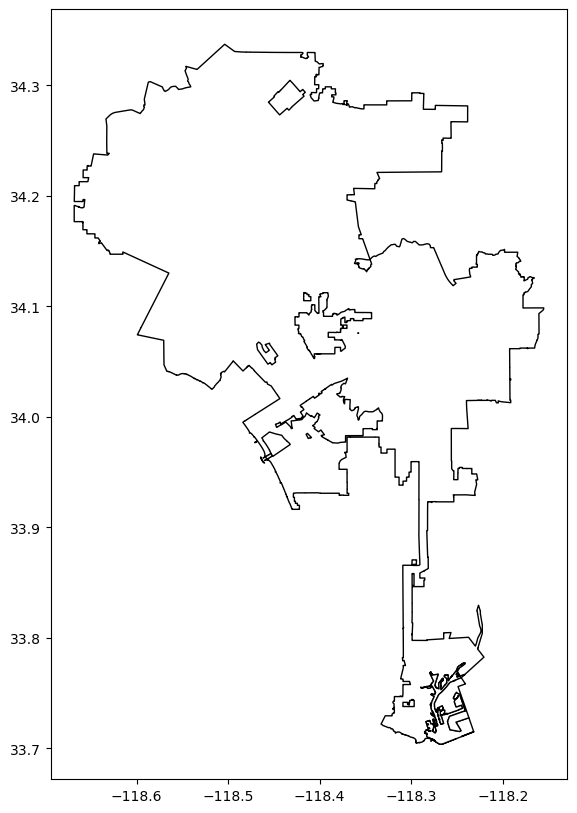

In [36]:
city_gdf.plot(figsize=(12,10), color='white', edgecolor='black')

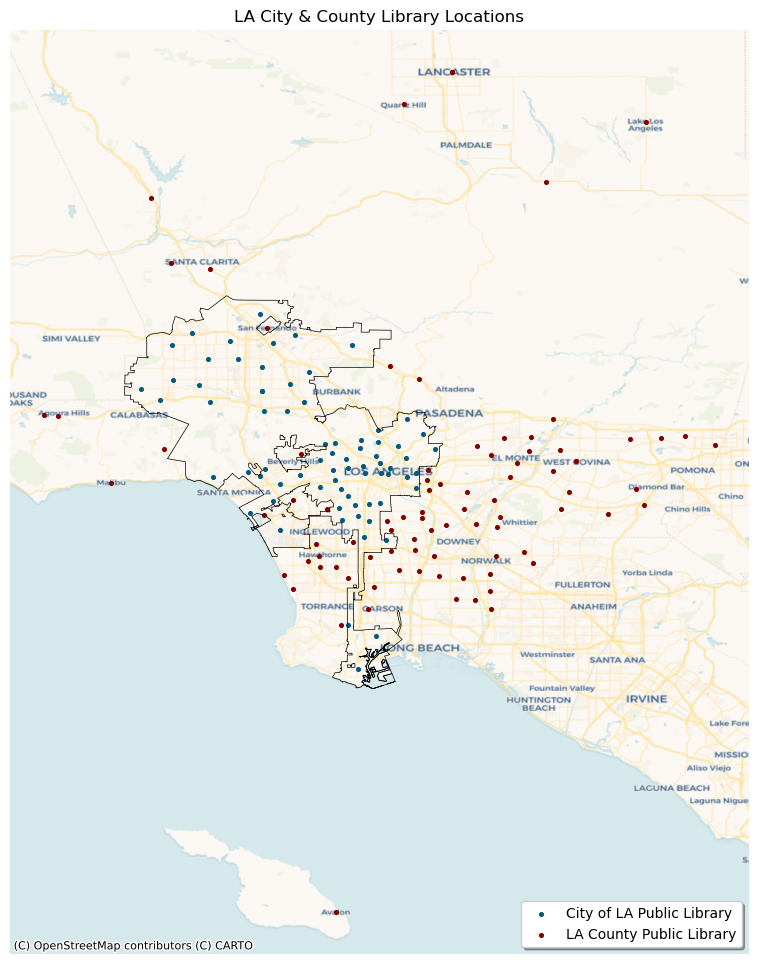

In [49]:
fig, ax = plt.subplots(figsize=(12,12))

geolapl.plot(ax=ax, 
        marker='o',
        markersize=7,
        color='#005a80',
        label='City of LA Public Library')

geocountylib.plot(ax=ax, 
        marker='o',
        markersize=7,
        color='#800000',
        label='LA County Public Library')

city_gdf.plot(ax=ax,
        facecolor='none',
        edgecolor='black',
        linewidth=0.5)

#legend = ax.legend(loc='lower right', shadow=True, fontsize='medium')

ax.axis('off')

ax.set_title('LA City & County Library Locations')
#ax.set_title('LA City Library Locations')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs=4326)

In [83]:
#In order to show the proximity of libraries to areas that have a lower Social Vulnerability Index, I overlayed the two maps.

<AxesSubplot: >

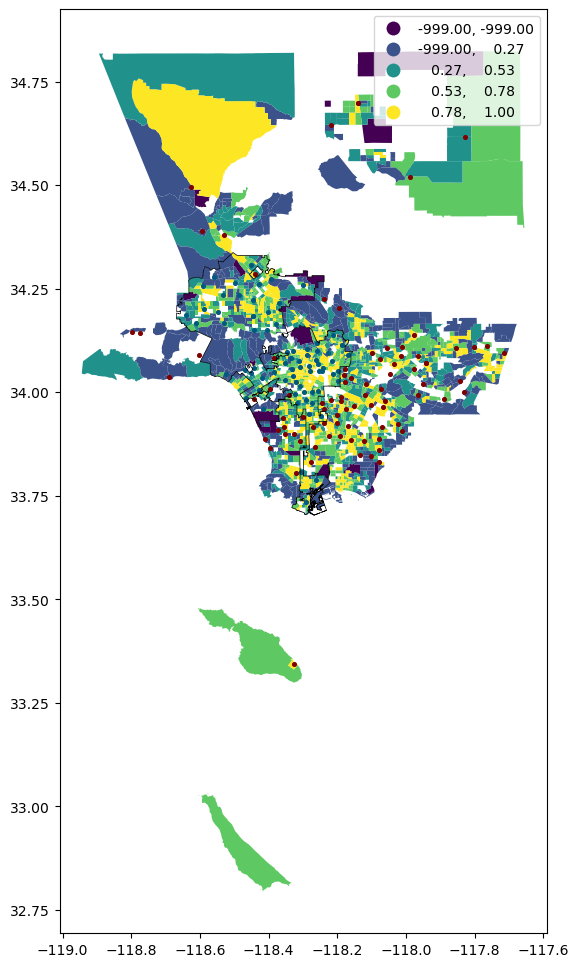

In [76]:
fig, ax = plt.subplots(figsize=(12,12))

tracts_svi.plot(ax = ax,
                figsize=(12,10),
                column='housing_transportation_v_score',
                legend=True, 
                scheme='NaturalBreaks')

geolapl.plot(ax = ax, 
        marker='o',
        markersize=7,
        color='#005a80',
        label='City of LA Public Library')

geocountylib.plot(ax = ax, 
        marker='o',
        markersize=7,
        color='#800000',
        label='LA County Public Library')

city_gdf.plot(ax = ax,
        facecolor='none',
        edgecolor='black',
        linewidth=0.5)

In [84]:
#The above map is too busy, and the colors of the tracts clashed with the colors of the libraries. I then desaturated the base map of the Social Vulnerability Index in order to make the libraries visible.

In [ ]:
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

<AxesSubplot: >

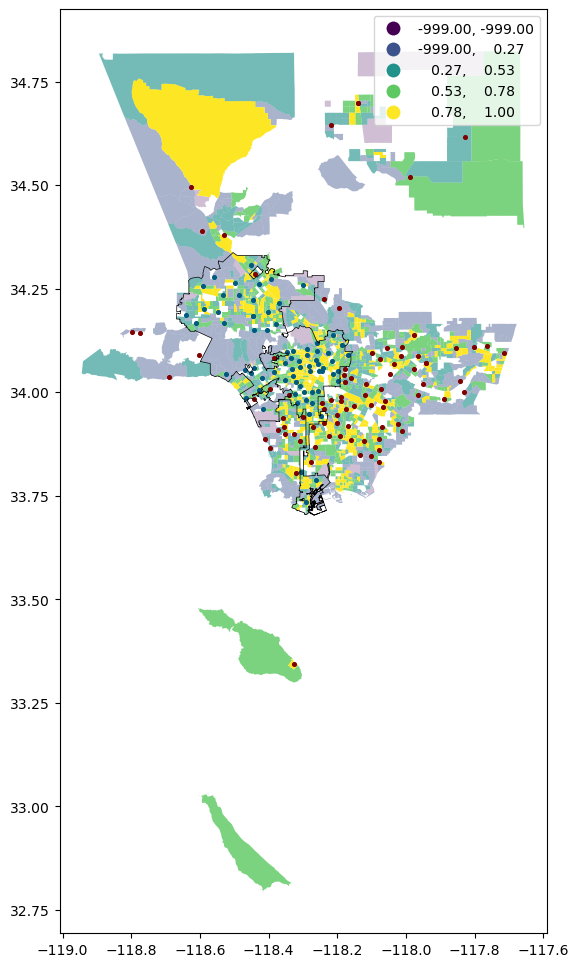

In [82]:
# Create a desaturated version of the viridis colormap
viridis_desat = cm.get_cmap('viridis', 256)
viridis_desat = viridis_desat(np.linspace(0, 1, 256))
viridis_desat[:, -1] = np.linspace(0.25, 1, 256) # adjust the alpha channel for desaturation
viridis_desat = ListedColormap(viridis_desat)

fig, ax = plt.subplots(figsize=(12,12))

tracts_svi.plot(ax = ax,
                figsize=(12,10),
                column='housing_transportation_v_score',
                legend=True, 
                scheme='NaturalBreaks',
                cmap=viridis_desat) # set the colormap to the desaturated version of viridis
geolapl.plot(ax = ax, 
        marker='o',
        markersize=7,
        color='#005a80',
        label='City of LA Public Library')

geocountylib.plot(ax = ax, 
        marker='o',
        markersize=7,
        color='#800000',
        label='LA County Public Library')

city_gdf.plot(ax = ax,
        facecolor='none',
        edgecolor='black',
        linewidth=0.5)